**Replace with your name and a brief description of the notebook.**

# Homework 23

This homework uses a dataset with nutritional information about Starbucks drinks.

Data URL: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/starbucks-menu-nutrition-drinks.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/starbucks-menu-nutrition-drinks.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

%matplotlib inline
pd.set_option("display.max_columns", None)

### Question 1: Loading and cleaning the data

Load the Starbucks data into a variable and drop any rows with missing data.

Additional information:
* Missing data is indicated by a dash "-" in the CSV file.
* Use the parameter `index_col =0` in `read_csv()` to use the drink name as the index

In [9]:
drinks = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/starbucks-menu-nutrition-drinks.csv", index_col=0, na_values="-")

In [11]:
drinks = drinks.dropna(how="any")

In [12]:
drinks

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Cool Lime Starbucks Refreshers Beverage,45.0,0.0,11.0,0.0,0.0,10.0
Strawberry Acai Starbucks Refreshers Beverage,80.0,0.0,18.0,1.0,0.0,10.0
Very Berry Hibiscus Starbucks Refreshers Beverage,60.0,0.0,14.0,1.0,0.0,10.0
Evolution Fresh Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
Mocha Light Frappuccino Blended Coffee,140.0,0.5,28.0,1.0,4.0,180.0
Cinnamon Dolce Creme,200.0,6.0,28.0,0.0,10.0,135.0
Vanilla Creme,200.0,6.0,28.0,0.0,10.0,135.0
Chocolate Smoothie,320.0,5.0,53.0,8.0,20.0,170.0


### Question 2:  Standardization and PCA

2a) What is the dimension of this data set?

**2a answer:** 92 rows and 6 columns (after removing all NaN values)

2b) Standardize the quantitative columns.

In [13]:
standardizer = StandardScaler()
drinks2_standardized = standardizer.fit_transform(drinks)
drinks2_standardized

array([[-0.96594202, -0.60437386, -0.90795601, -0.31621836, -0.73352567,
        -0.70479935],
       [-0.59097718, -0.60437386, -0.44535817,  0.39334479, -0.73352567,
        -0.70479935],
       [-0.8052428 , -0.60437386, -0.7096998 ,  0.39334479, -0.73352567,
        -0.70479935],
       [-0.26957875, -0.60437386,  0.21549589, -0.31621836, -0.73352567,
        -0.77831584],
       [-1.44803966, -0.60437386, -1.63489548, -0.31621836, -0.73352567,
        -0.85183232],
       [-0.05531314,  0.04216562, -0.24710195, -0.31621836,  0.14977749,
         0.10388199],
       [ 0.05181967,  0.04216562, -0.11493114, -0.31621836,  0.14977749,
         0.47146442],
       [-0.05531314,  0.04216562, -0.24710195, -0.31621836,  0.14977749,
         0.10388199],
       [-0.59097718, -0.60437386, -0.37927277, -0.31621836, -0.73352567,
        -0.70479935],
       [-0.8052428 , -0.60437386, -0.64361439, -0.31621836, -0.73352567,
        -0.70479935],
       [ 0.15895248, -0.60437386,  0.87634995, -0.

2c) Conduct Principal Components Analysis (PCA) with 2 components on the standardizer data. and plot the transformed data in a scatterplot.

In [14]:
pca = PCA(n_components=2)
pca.fit(drinks2_standardized)
drinks_pca = pca.transform(drinks2_standardized)

In [16]:
# put the coordinates into a DataFrame
drinks_pca_df = pd.DataFrame(drinks_pca, columns = ["PC1","PC2"])

2d) Plot the transformed data from 2c in a scatterplot

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

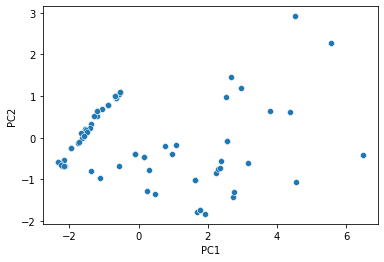

In [18]:
sns.scatterplot(data=drinks_pca_df, x="PC1", y="PC2")

2e) What do you notice about the scatterplot?  Do you see any clusters?

**2e answer:** No, there are not many clusters present in the graph.

### Question 3: KMeans

a) Use either the elbow method or the silhouette method to determine the best k for k-means clustering the standardized drinks data.

In [20]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(drinks_pca_df)
    clusters = kmeans.predict(drinks_pca_df)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

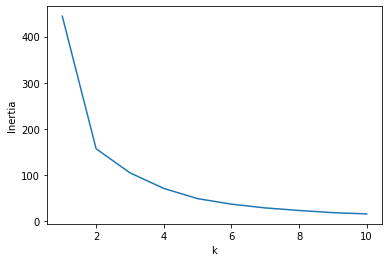

In [21]:
plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")

3b)  Based on your answer to 3a, what k do you recommend using for K-Means clustering for the Starbucks drinks data?

**3b answer:**  I reccomend a value of `k = 2`.

### Question 4: Applying PCA to visualize the K-Means clusters

a) Run K-Means clustering on the standardized Starbucks drinks data with the k selected in 3b. 

In [22]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(drinks_pca_df)
clusters = kmeans.predict(drinks_pca_df)

4b) Replot the scatterplot of the Starbucks drinks data where the x and y axes are the first and second principal components, and color the points by the cluster found in 4a.

In [24]:
drinks_pca_df['cluster'] = clusters

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

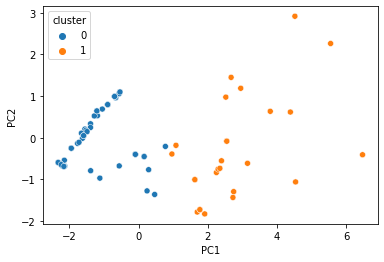

In [26]:
sns.scatterplot(data=drinks_pca_df, x="PC1", y="PC2", hue="cluster")

4c) How do the K-Means clusters correspond to the PCA visualization of the data?

**4c answer:** The drinks with a closer value for PC2 are clustered together and those with a further value of PC1 are clustered together.

### Bonus question

Do you see any patterns in how K-Means clustered the data, with regards to which drinks end up in which clusters? 